In [1]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive')
os.getcwd()

'/content/drive/My Drive'

In [2]:

from keras import backend as K
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
X=np.load('Atelectasis_Infiltration_X.npy')
X=X[50:70]

In [0]:

model = tf.keras.models.load_model('multi_class.h5')


In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
# For this model Atelectasis is 7 and the image above is for Atelectasis
preds = model.predict(X)
argmax = np.argmax(preds[1])
argmax
#This says that the network/model predicted the correct class for given x-ray

7

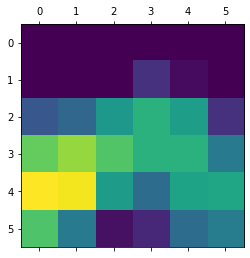

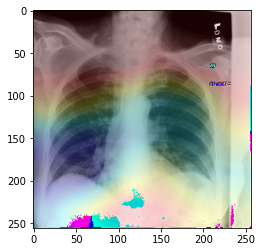

In [12]:
preds = model.predict(X)
argmax = np.argmax(preds[1])
output = model.output[:, argmax]
last_conv_layer = model.get_layer('conv2d_202')
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate(X)
for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
conv_layer_output_value
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()
img = X[1]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
hif = 0.2
superimposed_img = heatmap * hif + np.uint8(255 * img)
plt.imshow(superimposed_img.astype('uint8')) 
 

In [15]:
model = tf.keras.models.load_model('custom_binary.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 127, 127, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 127, 127, 32) 0           batch_normalization_203[0][0]    
______________________________________________________________________________________________

In [17]:
#  the image  is for Atelectasis, so for this model the output should be 1 which is Abnormal
preds = model.predict(X)
argmax = np.argmax(preds[1])
argmax
#This says that the network/model the can correctly classify given x-ray

1

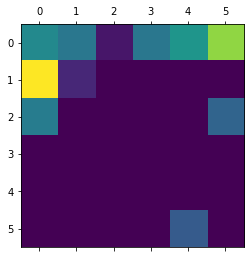

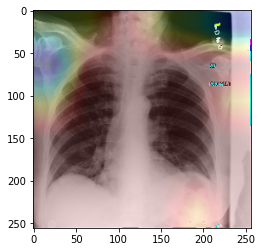

In [18]:
preds = model.predict(X)
argmax = np.argmax(preds[1])
output = model.output[:, argmax]
last_conv_layer = model.get_layer('conv2d_402')
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate(X)
for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
conv_layer_output_value
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()
img = X[1]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
hif = 0.2
superimposed_img = heatmap * hif + np.uint8(255 * img)
plt.imshow(superimposed_img.astype('uint8')) 
 

In [5]:
model = tf.keras.models.load_model('effusion_binary.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [6]:
#  the image  is for Atelectasis, so here effusion is absent  and the output should be zero
preds = model.predict(X)
argmax = np.argmax(preds[1])
argmax
#This says that the network/model predicted the correct class for given x-ray

0

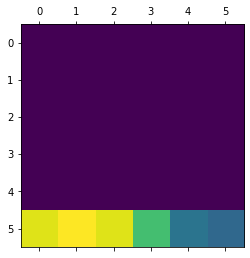

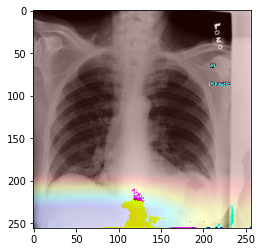

In [8]:
preds = model.predict(X)
argmax = np.argmax(preds[1])
output = model.output[:, argmax]
last_conv_layer = model.get_layer('conv2d_198')
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate(X)
for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
conv_layer_output_value
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()
img = X[1]
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
hif = 0.2
superimposed_img = heatmap * hif + np.uint8(255 * img)
plt.imshow(superimposed_img.astype('uint8')) 
 